<a href="https://colab.research.google.com/github/litaliSantos/PLN-Active-Recall-Assistant/blob/main/2025_Q3_PLN_PROJETO_PR%C3%81TICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2025-Q3]**
Prof. Alexandre Donizeti Alves

### **PROJETO PRÁTICO** [LangChain + Grandes Modelos de Linguagem]


### **EQUIPE**

---

**Integrante 01:**


Ana Carolina S. F. Parra - 11202320773

**Integrante 02:**

Litali Calheiros dos Santos - 11100216

### **GRANDE MODELO DE LINGUAGEM (*Large Language Model - LLM*)**

---

Por favor, informe os dados do LLM selecionada:

>


**LLM**: Google Gemini 2.5 Flash

>

**Link para a documentação oficial**: https://ai.google.dev/gemini-api/docs?hl=pt-br



### **API (Opcional)**
---

Por favor, informe os dados da API/Página WEB selecionada:

**Site oficial**: https://www.gutenberg.org

**Link para a documentação oficial**: https://www.gutenberg.org/policy/terms_of_use.html






### **RESUMO**
---

Este projeto apresenta o desenvolvimento de uma **ferramenta de estudos baseada em Processamento de Linguagem Natural** (PLN) e Grandes Modelos de Linguagem (LLMs). O objetivo central é **automatizar a transformação de textos extensos em materiais de aprendizagem mais acessíveis, como resumos e flashcards no estilo Anki**. Utilizando o framework LangChain e o modelo Gemini 2.5 Flash, a aplicação realiza etapas como extração de conteúdo online, limpeza textual, tradução, sumarização e geração de perguntas e respostas. O resultado é uma solução prática que facilita o aprendizado ativo, permitindo ao usuário converter qualquer conteúdo textual em um conjunto de recursos estruturados para estudo.

### **INTRODUÇÃO - A Curva de esquecimento**
---

O **domínio de conteúdo e sua retenção de Longo Prazo** são desafios constantes para estudantes, que frequentemente se fazem perguntas como:
- Qual é o **melhor momento** para revisar um conteúdo?
- Qual **técnica** de estudo utilizar?
- Como **evitar o esquecimento** após longos períodos sem contato com a matéria?

Diversos pesquisadores ao longo do tempo estudaram esses problemas, e um dos estudos mais conhecidos é a **curva do esquecimento** por Hermann Ebbinghaus.

Ela demonstra que, logo após aprender algo novo, **esquecemos a maior parte das informações nas primeiras 24 horas**. Depois disso, continuamos a perder grande parte do que aprendemos **se não houver reforço**.

Esse fenômeno ocorre porque **nosso cérebro tende a descartar informações que considera não essenciais**, ou seja, só retemos as memórias que revisitamos e reforçamos de alguma forma.

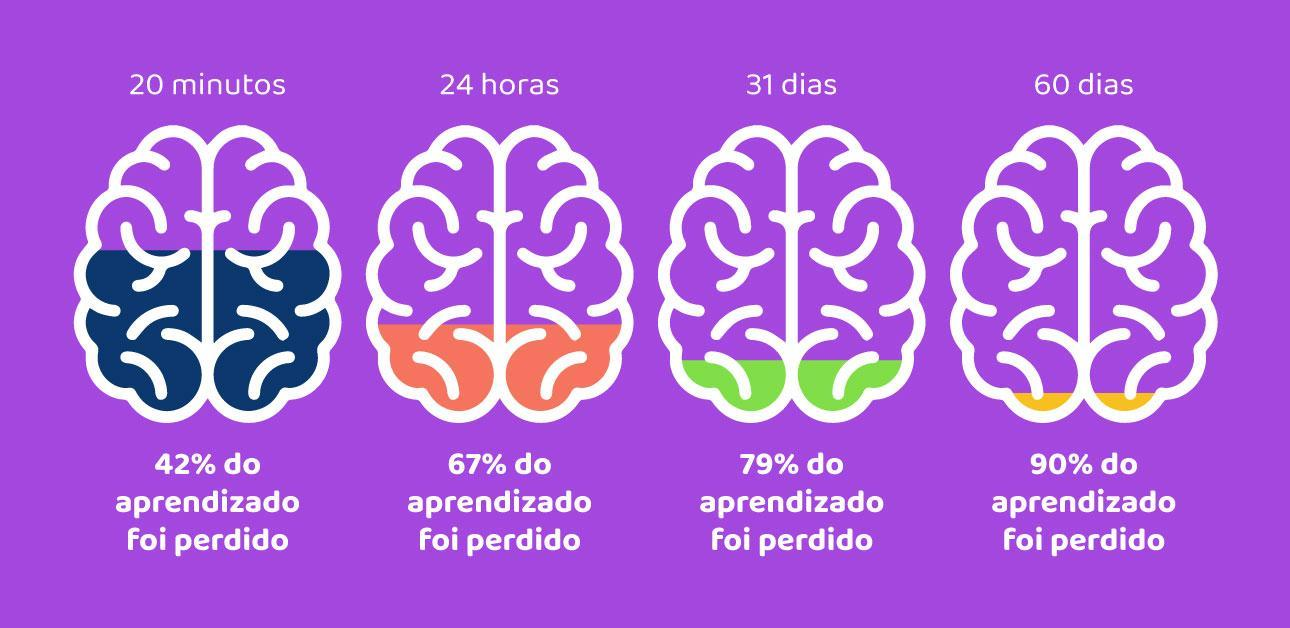

**Como podemos driblar a curva de esquecimento?**

Atualmente, temos duas estratégias de estudo principais que atuam para consolidar o aprendizado na memória de longo prazo. Elas funcionam de forma complementar:

1. **Spaced Repetition (Revisão Espaçada):** É a sua defesa contra a Curva do Esquecimento. Ao invés de fazer um "estudo massivo" (como estudar intensamente na véspera de uma prova, que só cria memória de curto prazo), você revisita o conteúdo pouco antes de esquecê-lo. Isso envia um sinal ao seu cérebro de que aquela informação é importante e merece ser movida para o armazenamento de longo prazo.

2. **Active Recall (Recordação Ativa):** Em vez de reler passivamente um texto, sublinhar ou assistir a uma aula novamente (métodos passivos), você se testa. Quando você se esforça para lembrar a resposta, você está ativamente reforçando as conexões neurais. O esforço cognitivo (o "trabalho" de tentar lembrar) é o que consolida a memória.

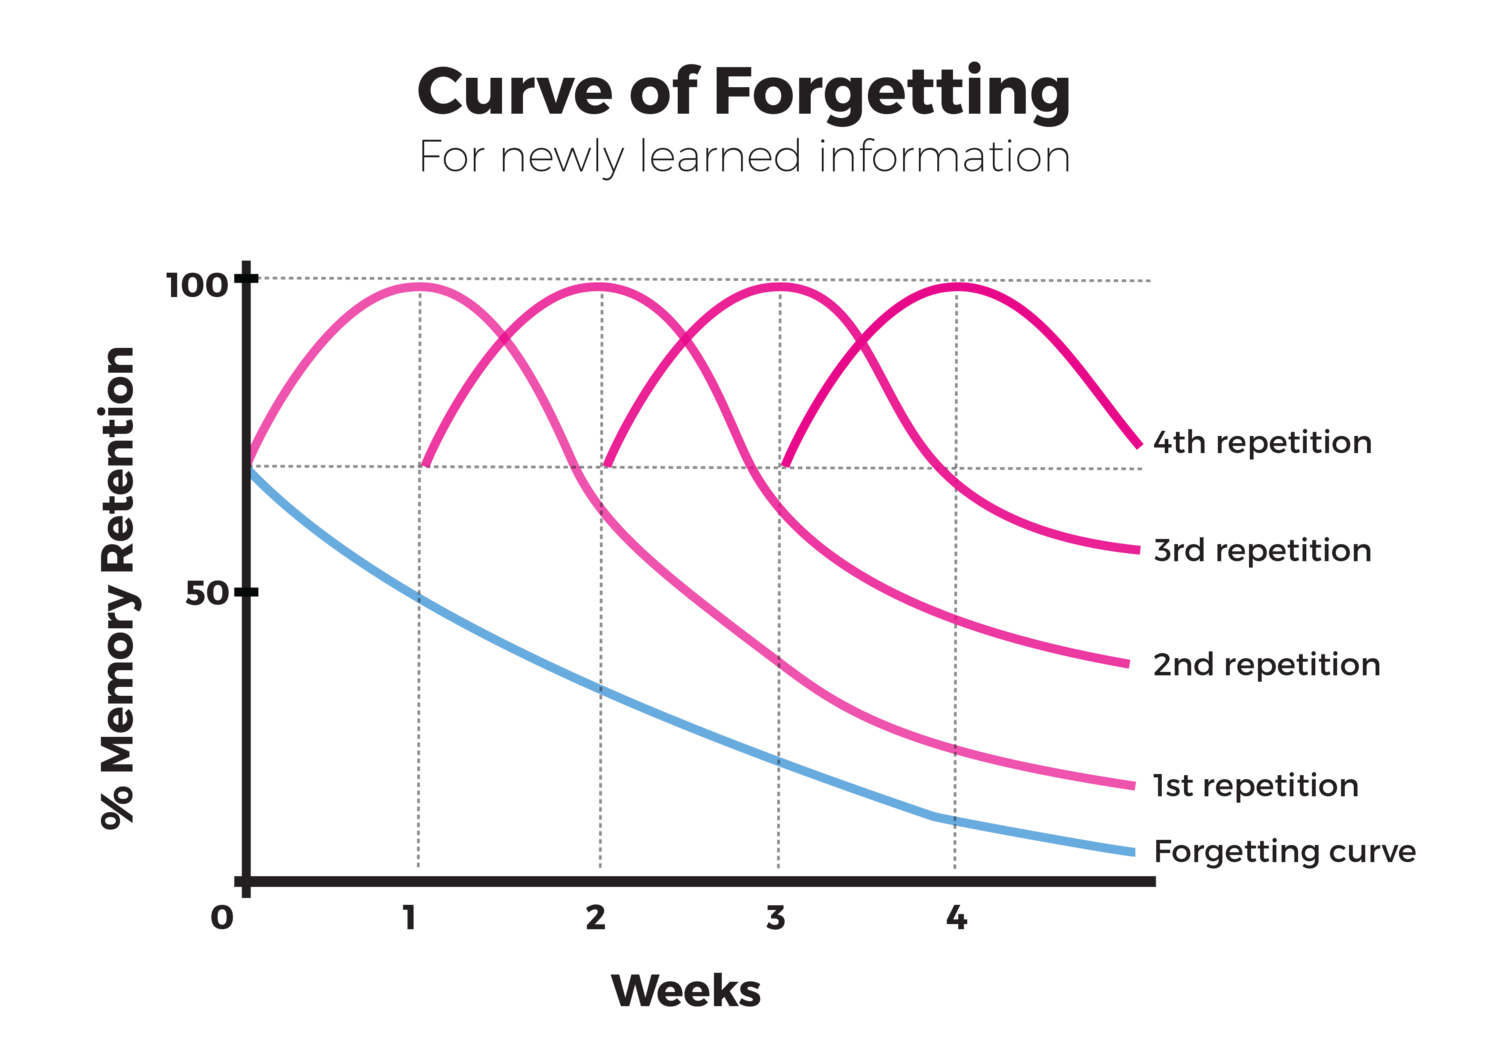

### **FlashCards**
---

Dentro desse contexto, surgem os flashcards. Um **flashcard é um cartão de duas faces**, onde:
- **Face Frontal**: Contém um estímulo ou uma pergunta (ex: uma palavra-chave, um conceito, uma data histórica, uma fórmula).
- **Verso**: Contém a resposta, informação completa que deve ser lembrada (ex: a definição, a explicação, o resultado da fórmula).

O verdadeiro valor dos flashcards reside na sua capacidade de transformar a passividade do estudo, implementando as duas das estratégias cognitivas tratadas anteriormente:

- **Recordação Ativa**: Ao ler o estímulo na face frontal, você interrompe a leitura passiva e força o cérebro a fazer o trabalho de recuperação.

- **Repetição Espaçada**: Após a recordação, você avalia a qualidade da sua resposta. Essa classificação (por exemplo: "Fácil", "Médio", "Difícil") determina o próximo intervalo de revisão.

Uma das plataformas de frashcards mais famosas é o **Anki**. O Anki é uma ferramenta open source que **permite criar flashcards** altamente personalizáveis. **O próprio sistema registra o desempenho e agenda quando o conteúdo deve ser revisto** novamente, priorizando o que o estudante mais erra.

No entanto, o processo de criar as anki cards (como são chamadas as flashcards do app) pode ser custoso. O anki é altamente personalzado inclusive na sua interface e fica facil se perder nas personalizações.

Além disso **para que um flashcard seja realmente útil**, o estudante precisa primeiro **compreender o conteúdo**. Isso torna a sumarização uma etapa fundamental no processo. **Antes de gerar perguntas, é preciso extrair as ideias principais**, reorganizar a informação e garantir que o texto seja claro, coerente e acessível.





### **Problematica**
---


Esse projeto foi pensado com o objetivo de **superar esses desafios** inerentes à **sumarização de conteúdos** e à **criação eficiente de flashcards (Anki)**. A partir daqui, veremos os aspectos práticos e técnicos da sua construção, detalhando a implementação passo a passo.

### **IMPLEMENTAÇÃO**
---

Instalações de dependências

In [ ]:
#@title Instalação do Pacote
!pip install -qU langchain-google-genai

In [ ]:
#@title Instalando a biblioteca da API Gemini
!pip install -q -U google-genai

In [ ]:
#@title Versão da API Gemini

import google.generativeai as genai

print(genai.__version__)

0.8.5


In [ ]:
#@title Definindo a chave da API
from getpass import getpass
import google.generativeai as genai

GEMINI_API_KEY = getpass("Enter your Google AI API key: ")
genai.configure(api_key=GEMINI_API_KEY)

Enter your Google AI API key: ··········


In [ ]:
#@title Integração Gemini com Langchain e Teste
from langchain_core.language_models.llms import LLM
from typing import Optional, List
import google.generativeai as genai

class GeminiLLM(LLM):
    model: str = "gemini-2.5-flash"

    @property
    def _llm_type(self) -> str:
        return "gemini-custom"

    def _call(self, prompt: str, stop: Optional[List[str]] = None) -> str:
        response = genai.GenerativeModel(self.model).generate_content(prompt)
        return response.text

    @property
    def _identifying_params(self):
        return {"model": self.model}

llm = GeminiLLM()

# teste de chamada
print(llm.invoke("Explain what Natural Language Processing is in just 2 phrases."))


Enabling computers to understand and generate human language.
Allowing machines to intelligently process text and speech.


In [ ]:
#@title Requisição do texto de um livro do Projeto Gutenberg

import requests

url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"  # Alice in Wonderland
response = requests.get(url)

raw_text = response.text
print("Tamanho total do texto:", len(raw_text))

print(raw_text[:2095])  # visualizar os primeiros 2095 caracteres

Tamanho total do texto: 167674
﻿The Project Gutenberg eBook of Alice's Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release date: June 27, 2008 [eBook #11]
                Most recently updated: June 26, 2025

Language: English

Credits: Arthur DiBianca and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 

In [ ]:
#@title Localização do Capítulo XI por meio de Expressões Regulares
import re

# encontrar TODAS as ocorrências de XI e XII
positions_11 = [m.start() for m in re.finditer(r"CHAPTER XI\.", raw_text)]
positions_12 = [m.start() for m in re.finditer(r"CHAPTER XII\.", raw_text)]

print("Posições CHAPTER XI:", positions_11)
print("Posições CHAPTER XII:", positions_12)

# usar a SEGUNDA ocorrência (índice 1), que é o capítulo de verdade
start_index = positions_11[1]
end_index = positions_12[1]

chapter_11 = raw_text[start_index:end_index]

print("Número de caracteres do Capítulo XI:", len(chapter_11))
print(chapter_11[:1000])


Posições CHAPTER XI: [1372, 126220]
Posições CHAPTER XII: [1410, 136874]
Número de caracteres do Capítulo XI: 10654
CHAPTER XI.
Who Stole the Tarts?


The King and Queen of Hearts were seated on their throne when they
arrived, with a great crowd assembled about them—all sorts of little
birds and beasts, as well as the whole pack of cards: the Knave was
standing before them, in chains, with a soldier on each side to guard
him; and near the King was the White Rabbit, with a trumpet in one
hand, and a scroll of parchment in the other. In the very middle of the
court was a table, with a large dish of tarts upon it: they looked so
good, that it made Alice quite hungry to look at them—“I wish they’d
get the trial done,” she thought, “and hand round the refreshments!”
But there seemed to be no chance of this, so she began looking at
everything about her, to pass away the time.

Alice had never been in a court of justice before, but she had read
about them in books, and she was quite pleased t

In [ ]:
#@title Extração do capítulo XI
import re

# encontrar TODAS as ocorrências de XI e XII
positions_11 = [m.start() for m in re.finditer(r"CHAPTER XI\.", raw_text)]
positions_12 = [m.start() for m in re.finditer(r"CHAPTER XII\.", raw_text)]

print("Posições CHAPTER XI:", positions_11)
print("Posições CHAPTER XII:", positions_12)

# usar a SEGUNDA ocorrência (índice 1), que é o capítulo de verdade
start_index = positions_11[1]
end_index = positions_12[1]

chapter_11 = raw_text[start_index:end_index]

print("Número de caracteres do Capítulo XI:", len(chapter_11), "\n")
print(chapter_11)

Posições CHAPTER XI: [1372, 126220]
Posições CHAPTER XII: [1410, 136874]
Número de caracteres do Capítulo XI: 10654 

CHAPTER XI.
Who Stole the Tarts?


The King and Queen of Hearts were seated on their throne when they
arrived, with a great crowd assembled about them—all sorts of little
birds and beasts, as well as the whole pack of cards: the Knave was
standing before them, in chains, with a soldier on each side to guard
him; and near the King was the White Rabbit, with a trumpet in one
hand, and a scroll of parchment in the other. In the very middle of the
court was a table, with a large dish of tarts upon it: they looked so
good, that it made Alice quite hungry to look at them—“I wish they’d
get the trial done,” she thought, “and hand round the refreshments!”
But there seemed to be no chance of this, so she began looking at
everything about her, to pass away the time.

Alice had never been in a court of justice before, but she had read
about them in books, and she was quite pleased

In [ ]:
#@title Limpeza do Texto do Capítulo XI
import re

def clean_chapter(text):
    text = text.replace("\r", "")
    text = re.sub(r"[ \t]+", " ", text) #remove tabs e múltiplos espaços
    text = re.sub(r"\n{3,}", "\n\n", text) #limita linhas em branco
    text = re.sub(r"\n +", "\n", text) #remove espaços no início da linha
    text = text.strip()
    return text

cleaned_ch11 = clean_chapter(chapter_11)


In [ ]:
#@title Tradução do Capítulo XI para português

translation_prompt = """
Você é um tradutor profissional de inglês para português.
Traduza o texto abaixo para português brasileiro de forma:

- clara
- natural
- mantendo o estilo original
- sem remover detalhes importantes
- sem adicionar nada que não esteja no texto

TEXTO EM INGLÊS:
{texto}
"""

def translate_to_portuguese(texto):
    prompt = translation_prompt.format(texto=texto)
    return llm.invoke(prompt)

translated_ch11 = translate_to_portuguese(cleaned_ch11)
print(translated_ch11)

Aqui está a tradução para português brasileiro:

CAPÍTULO XI.
Quem Roubou as Tortas?

O Rei e a Rainha de Copas estavam sentados em seu trono quando ela chegou, com uma grande multidão reunida à volta deles — todo tipo de passarinhos e feras pequenas, assim como o baralho inteiro: o Valete estava diante deles, acorrentado, com um soldado de cada lado para guardá-lo; e perto do Rei estava o Coelho Branco, com uma trombeta em uma das mãos e um pergaminho na outra. Bem no meio do tribunal havia uma mesa, com uma grande travessa de tortas em cima: elas pareciam tão boas, que deixaram Alice faminta só de olhar para elas — “Ah, se eles terminassem logo o julgamento,” ela pensou, “e servissem os comes e bebes!” Mas parecia não haver chance disso, então ela começou a olhar tudo ao seu redor para passar o tempo.

Alice nunca estivera num tribunal de justiça antes, mas lera a respeito em livros, e ficou bastante satisfeita ao descobrir que sabia o nome de quase tudo ali. “Aquele é o juiz,” ela d

In [ ]:
#@title Função de sumarização do Capítulo XI
summary_prompt = """
Você é um especialista em resumir textos.
Crie um resumo curto, objetivo e bem organizado do capítulo abaixo.

Regras:
1. Escreva em português.
2. Máximo de 6 frases.
3. Priorize a ideia central do capítulo.
4. Use linguagem simples.
5. Não invente informações.

CAPÍTULO:
{texto}
"""

def summarize(texto):
    prompt = summary_prompt.format(texto=texto)
    return llm.invoke(prompt)
resumo = summarize(translated_ch11)
print(resumo)


O capítulo descreve o início de um julgamento caótico no tribunal do Rei e da Rainha de Copas. O Valete de Copas é acusado de roubar as tortas da Rainha, e o Coelho Branco atua como arauto.

Alice observa o processo, notando a incompetência do Rei como juiz e as anotações sem sentido do júri, e até interfere ao remover um lápis. Durante o julgamento, Alice começa a crescer novamente, causando desconforto aos presentes.

As testemunhas, o Chapeleiro e a Cozinheira, fornecem depoimentos confusos e irrelevantes, sendo constantemente ameaçados. O Arganaz causa alvoroço ao interromper a Cozinheira, que desaparece na confusão.

O capítulo termina de forma surpreendente com o Coelho Branco anunciando Alice como a próxima testemunha a ser chamada.


In [ ]:
#@title Função de Flashcards (Sistema de Perguntas e Respostas) em Português

flashcard_prompt = """
Você é um gerador de flashcards de estudo.
Crie de 10 flashcards baseados no capítulo abaixo.

Formato:
PERGUNTA: ...
RESPOSTA: ...

Regras:
- Em português
- Perguntas diretas
- Respostas curtas e claras
- Não invente conteúdo
- Foco nos eventos, personagens e ações do capítulo

CAPÍTULO:
{texto}
"""

def create_flashcards(texto):
    prompt = flashcard_prompt.format(texto=texto)
    return llm.invoke(prompt)

flashcards_ch11 = create_flashcards(translated_ch11)
print(flashcards_ch11)

Aqui estão 10 flashcards baseados no capítulo:

PERGUNTA: Quem estava sendo julgado no tribunal?
RESPOSTA: O Valete de Copas.

PERGUNTA: Qual era a acusação contra o Valete de Copas?
RESPOSTA: Ele roubou as tortas feitas pela Rainha de Copas.

PERGUNTA: Quem era o juiz do julgamento?
RESPOSTA: O Rei de Copas.

PERGUNTA: Qual era a função do Coelho Branco no tribunal?
RESPOSTA: Ele era o arauto.

PERGUNTA: O que os jurados estavam escrevendo em suas lousas inicialmente?
RESPOSTA: Seus próprios nomes.

PERGUNTA: O que Alice fez com o lápis de Bill, o Lagarto, um dos jurados?
RESPOSTA: Ela o tirou das mãos dele.

PERGUNTA: Quem foi a primeira testemunha a ser chamada?
RESPOSTA: O Chapeleiro.

PERGUNTA: O que o Chapeleiro carregava quando entrou no tribunal?
RESPOSTA: Uma xícara de chá e um pedaço de pão com manteiga.

PERGUNTA: Quem foi a segunda testemunha a ser chamada?
RESPOSTA: A Cozinheira da Duquesa.

PERGUNTA: Quem foi a última pessoa chamada para ser testemunha no final do capítul

In [ ]:

#@title Função de Geração de Flashcards em Formato CSV

flashcard_csv_prompt = """
Você receberá flashcards no formato:

PERGUNTA: ...
RESPOSTA: ...

Converta isso para CSV com o formato:
pergunta;resposta

Regras:
- Use ponto e vírgula como separador (;)
- Não adicione texto extra
- Não numere
- Não altere perguntas ou respostas
- Apenas retorne linhas CSV

FLASHCARDS:
{texto}
"""

def flashcards_to_csv(flashcards_texto):
    prompt = flashcard_csv_prompt.format(texto=flashcards_texto)
    return llm.invoke(prompt)

# Usa diretamente as flashcards geradas na seção anterior
flashcards_csv = flashcards_to_csv(flashcards_ch11)
print(flashcards_csv)

# Salvando o CSV em arquivo
with open("flashcards.csv", "w", encoding="utf-8") as f:
    f.write(flashcards_csv)

print("Arquivo flashcards.csv criado!")

# Fazendo download automático no Colab
from google.colab import files
files.download("flashcards.csv")


Quem estava sendo julgado no tribunal?;O Valete de Copas.
Qual era a acusação contra o Valete de Copas?;Ele roubou as tortas feitas pela Rainha de Copas.
Quem era o juiz do julgamento?;O Rei de Copas.
Qual era a função do Coelho Branco no tribunal?;Ele era o arauto.
O que os jurados estavam escrevendo em suas lousas inicialmente?;Seus próprios nomes.
O que Alice fez com o lápis de Bill, o Lagarto, um dos jurados?;Ela o tirou das mãos dele.
Quem foi a primeira testemunha a ser chamada?;O Chapeleiro.
O que o Chapeleiro carregava quando entrou no tribunal?;Uma xícara de chá e um pedaço de pão com manteiga.
Quem foi a segunda testemunha a ser chamada?;A Cozinheira da Duquesa.
Quem foi a última pessoa chamada para ser testemunha no final do capítulo?;Alice.
Arquivo flashcards.csv criado!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **IMPORTANDO O ARQUIVO CSV NO ANKI**
---

**Vídeo demonstrativo:** [Clique aqui (Google Drive)](https://drive.google.com/drive/folders/1lWatDM_C8xIwjrb1o3WiFOsrtqRSYlaP?usp=sharing)

### **RESUMO METODOLÓGICO**
---

A metodologia do projeto foi estruturada em quatro etapas principais:

1. **Coleta e seleção do texto:** Utilizou-se um livro de domínio público do Projeto Gutenberg como fonte de dados (o capítulo XI de Alice in Wonderland foi selecionado para os testes).

2. **Processamento e limpeza do texto:** Normalização de espaços, remoção de quebras excessivas de linha e outros ruídos. Extração precisa do capítulo utilizando expressões regulares.

3. **Aplicação das técnicas de PLN:**
  - **Tradução:** Tradução do texto original em inglês para o português, preservando estilo e coerência.
  - **Sumarização:** Geração de um resumo de até seis frases, enfatizando os pontos centrais.
  - **Geração de Flashcards (Q&A):** Criação de perguntas e respostas objetivas com foco no conteúdo do capítulo.

4. **Integração com LLM via LangChain:** Implementação de uma classe personalizada GeminiLLM para integrar o modelo ao LangChain. Encapsulamento dos prompts em funções reutilizáveis.


### **CONSIDERAÇÕES FINAIS**
---

Neste projeto, optamos por utilizar um **modelo simples de flashcards**, baseado exclusivamente no formato de **pergunta e resposta**. Essa estrutura foi suficiente para demonstrar o funcionamento da ideia, mas abre espaço para expansões futuras, como cartões mais complexos, prompts diferenciados, explicações detalhadas, exemplos práticos ou até modelos variados para diferentes tipos de conteúdo.

A escolha do capítulo de Alice in Wonderland ocorreu principalmente pela facilidade de integração com o Projeto Gutenberg. No entanto, **a proposta da ferramenta não se limita à literatura**. Assim como hoje o sistema gera perguntas sobre eventos do capítulo escolhido, ele poderia, por exemplo, ao processar um capítulo de um livro de PLN, gerar automaticamente questões como “O que é tokenização?” ou “Qual a diferença entre stemming e lemmatization?”. Dessa forma, **a ferramenta tem potencial para apoiar estudos em qualquer área do conhecimento**.

A função criada para recortar apenas o capítulo XI foi implementada exclusivamente para fins de teste. Em versões futuras, a solução poderia ser aprimorada para identificar automaticamente se o documento analisado é um livro ou um artigo, detectar onde começam e terminam capítulos ou seções, e adaptar o processamento conforme a estrutura do texto.

A **etapa de tradução** agrega valor ao processo, **permitindo que o usuário estude conteúdos provenientes de outros países e culturas**. Embora, neste caso, o texto original estivesse em inglês, uma evolução importante seria permitir que o sistema detecte automaticamente o idioma de entrada e traduza para qualquer idioma desejado pelo usuário.

De maneira geral, o projeto demonstrou que **é possível integrar técnicas de Processamento de Linguagem Natural com grandes modelos de linguagem para criar uma ferramenta prática, versátil e eficiente para estudos**. A solução apresentada facilita o acesso ao conhecimento, reduz o esforço manual na preparação de materiais e abre caminho para uma série de melhorias que podem torná-la ainda mais poderosa e adaptável a diferentes contextos educacionais.